<a href="https://colab.research.google.com/github/nepslor/teaching/blob/main/TimeSeriesForecasting/solutions/outlier_detection_in_TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outlier detection for time series
In this groupwork we will try to remove pointwise outliers from three synthetic datasets using a forecaster to produce saliency scores $s_t$.

Given a forecaster 
$$\hat{x}_{t+1} = f(x_{t|T})$$

For example, $s$ could be defined as 
$$s_{t+1} = \begin{cases} 
x_{t+1}-q_{0.99}   \quad \text{if} \quad x_{t+1}>q_{0.99}\\
q_{0.01} - x_{t+1} \quad \text{if} \quad x_{t+1}<q_{0.01}
\end{cases}$$

where $q_{0.99}$ and $q_{0.01}$ are the 99% and 1%, theoretic or empirical, quantiles of the predictions.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('https://raw.githubusercontent.com/nepslor/teaching/main/TimeSeriesForecasting/data/outliers.csv', index_col=0)

[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]

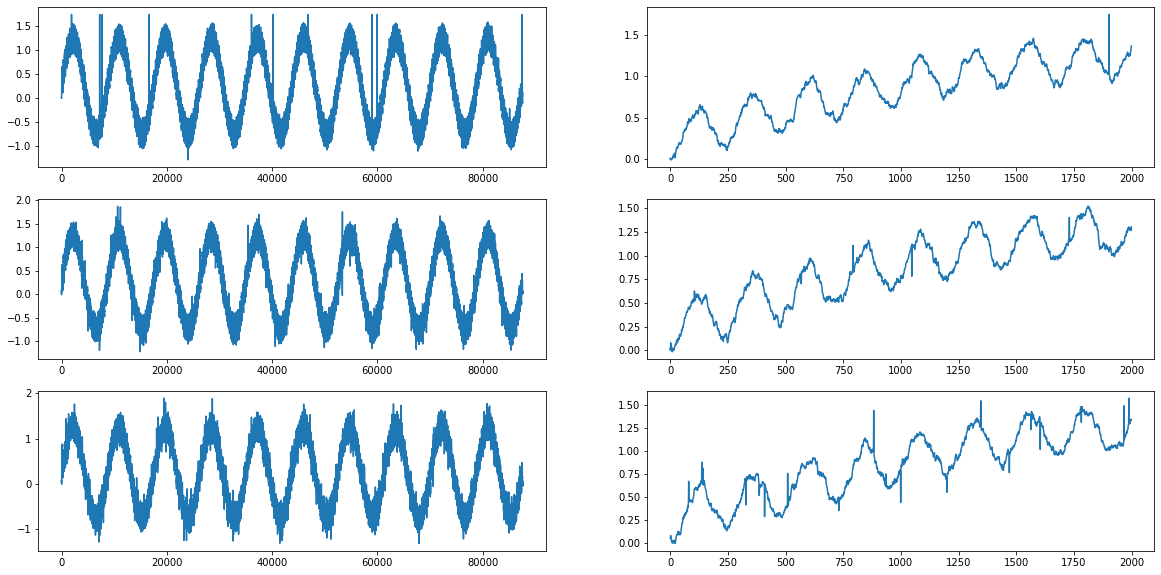

In [17]:
fig, ax = plt.subplots(3, 2, figsize=(20, 10))
[data[d].plot(ax=a) for d, a in zip(data, ax[:, 0])]
[data[d].iloc[:2000].plot(ax=a) for d, a in zip(data, ax[:, 1])]


The three datasets present the following characteristics:
1. Few out-of-distributions outliers: these outliers are higher than the maximum observed values, are easy to find
2. Few local outliers. These cannot be filter out using a filter on the entire distribution, a sliding window method should be used.
3. A lot local outliers. Some methods could fail to spot those, since more than one could be present in the sliding window. Possibly an iterative method (in which outliers are spotted and replaced sequentially) could help.



In [20]:
%%capture
!pip install hampel
from hampel import hampel


In [31]:
outlier_indices = hampel(data['0'], window_size=24, n=3)
print(len(outlier_indices))
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
data['0'].plot(ax=ax)
ax.plot(outlier_indices, data['0'][outlier_indices], '.')

248


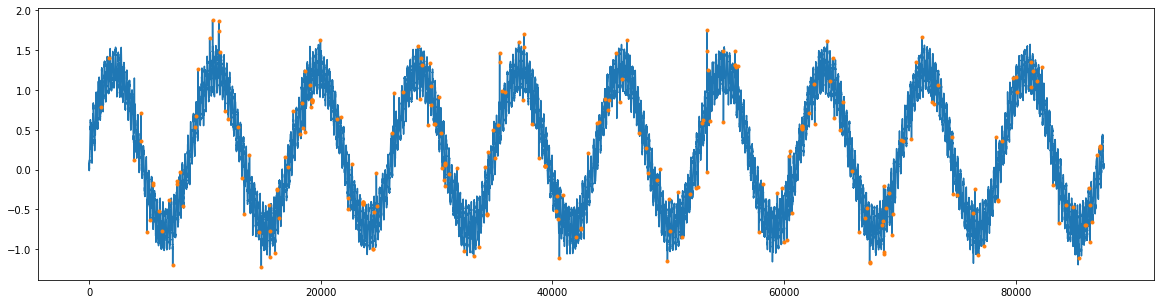

In [34]:
outlier_indices = hampel(data['1'], window_size=24, n=3)
print(len(outlier_indices))
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
data['1'].plot(ax=ax)
ax.plot(outlier_indices, data['1'][outlier_indices], '.')

493


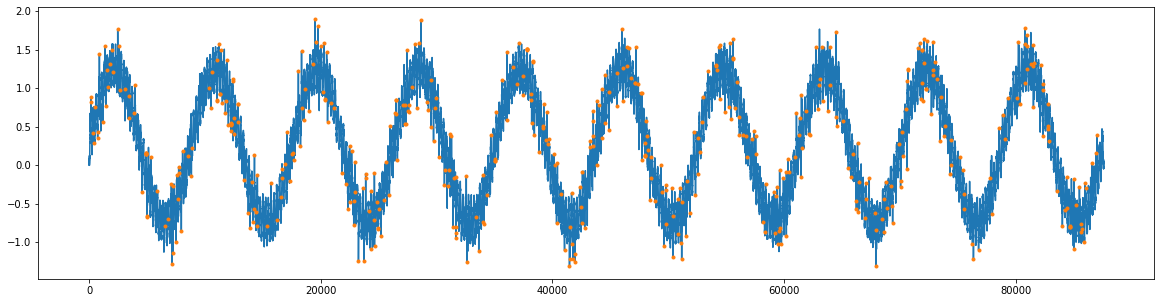

In [35]:
outlier_indices = hampel(data['2'], window_size=24, n=3)
print(len(outlier_indices))
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
data['2'].plot(ax=ax)
ax.plot(outlier_indices, data['2'][outlier_indices], '.')